#Nombre: Jose Luis Soto Soto. Codigo: 2181583.


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sympy import *
from mpl_toolkits.mplot3d import Axes3D  

#Punto 1,2 y 3

Establecemos la funcion objetivo:
$$f(x,y) = (x-1)^2 + (y-2)^2 $$

Junto con su restriccion:
$$ g(x,y) = (x-1)^2 - 5y = 0 $$

La funcion de lagrange:
$$L(x,y,λ) = f(x,y) +  λ*g(x,y)$$


In [ ]:
x, y, l = symbols('x y l')
f = (x-1)**2 +(y-2)**2 #Objetive function
g = (x-1)**2 - 5*y #onstraint funcion
L = f + l*g

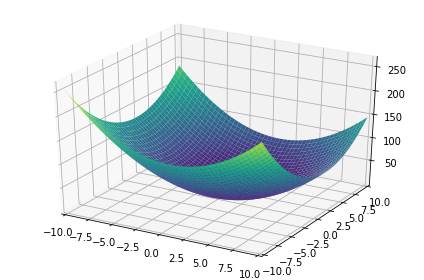

In [ ]:
plotting.plot3d(f,(g,0))

Para poder solucionar el siguiente sistema de ecuaciones:
$$\frac{dL}{dx} = 0$$
$$\frac{dL}{dy} = 0$$
$$g(x,y) = 0$$

In [ ]:
dLdx = Eq(diff(L,x),0)
dLdy = Eq(diff(L,y),0)
rest = Eq(g,0)

In [ ]:
solutions = solve([rest, dLdx, dLdy], (x, y, l))
solutions

[(1, 0, -4/5), (1 - sqrt(10)*I/2, -1/2, -1), (1 + sqrt(10)*I/2, -1/2, -1)]

solutions:

$$1, 0, -\frac{4}{5}$$


$$1 - \frac{\sqrt{10}*I}{2}, -\frac{1}{2}, -1$$


$$1 + \frac{\sqrt{10}*I}{2}, -\frac{1}{2}, -1$$

Obteniendo de tal forma un solo punto graficable ya que 2 de estos poseen coordenada Imaginaria en X.

In [ ]:
x1 = np.linspace(-5,5,100)
alty = np.linspace(-5,5,100)
v1, v2 = np.meshgrid(x1, alty)
y1 = (1/5)*(x1-1)**2
miny = (v1 - 1)**2 + (v2 - 2)**2

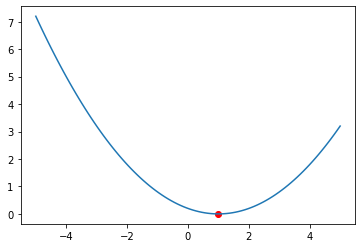

In [ ]:
plt.plot(x1, y1)
plt.scatter(1, 0, color='red') 

Permitiendo asi concluir que siendo este el unico punto factible, vendria a ser el mismo punto solucion, es decir:

$$x=1$$
$$y=0$$
$$λ=-0.8$$

#Punto 4
Primero, se reemplaza $5y$ en la funcion objetivo, obteniendo la funcion objetivo de:
$$f(y) = 5y + (y-2)^2 $$

Sin restricciones, por tanto para minimizarse se puede resolver la siguiente ecuacion:
$$\frac{df}{dy}=0$$

In [ ]:
f2 = 5*y + (y - 2)**2
df2dy = Eq(diff(f2, y), 0)
sol = solve([df2dy])
sol

{y: -1/2}

Por lo tanto la solición de este problema de optimización cendria a ser sin impoertar que valor asuma la variable *x*, simepre y cuando $y=-\frac{1}{2}$, entonces es un punto factible. Lo cual, para el problema de optimzación inicial, no es porsible, dado que la restriccion inicial $g(x,y)$ solo posee un $x$ para el cual $y=-\frac{1}{2}$, es decir del conjunto de soluciones $(x,y)$ correspondiente al segundo problema de optimizacion planteado solo hay un punto factible que cumple la restriccion del primer problema de optimizacion.

#Punto 5

Se debe hallar el maximo de la funcion:
$$
f(x,y)=x*y
$$
Sujeto a la restricción:
$$
1 - x^2- y^2≥0  
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


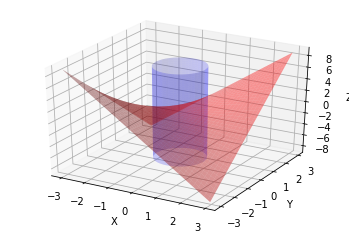

In [ ]:
def fun(x, y):
    return x*y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

x=np.linspace(-3, 3, 100)
z=np.linspace(-8, 8, 100)
Xc, Zc=np.meshgrid(x, z)
Yc = np.sqrt(1-Xc**2)
ax.plot_surface(Xc, Yc, Zc, alpha=0.2,color="blue")
ax.plot_surface(Xc, -Yc, Zc, alpha=0.2,color="blue")

ax.plot_surface(X, Y, Z,color="red", alpha=0.4)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

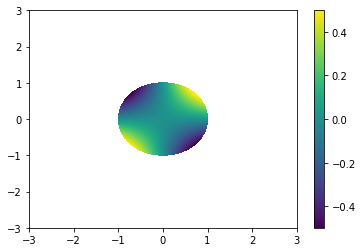

In [ ]:
x1 = np.linspace(-3,3,1000)
x2 = np.linspace(-3,3,1000)
v1, v2= np.meshgrid(x1,x2)

y = x1*x2
zval=v1*v2
z = np.ma.masked_where((1-v2**2-v1**2<0), zval)
figure, axes = plt.subplots()
H=axes.pcolormesh(x1,x2,z)
figure.colorbar(H)

Como se puede apreciar en la grafica, la maxima indudablemente se encuentra en los extremos de la region factible, por tanto podemos reducir la restriccion a 
$$g(x,y) = 1-x^2-y^2 = 0$$

Para posteriormente platear el siguiente sistema de ecuaciones:
$$\frac{dL}{dx} = 0$$
$$\frac{dL}{dy} = 0$$
$$g(x,y) = 0$$

Donde 
$$L(x,y,λ) = f(x,y) +  λ*g(x,y)$$

In [ ]:
x , y, l = symbols('x y l')
f = x*y #Objetive function
g = 1 - x**2 - y**2  #Constraint funcion
L = f + l*g

#Y solucionarlo, obteniendo los puntos KKT
dLdx = Eq(diff(L,x),0)
dLdy = Eq(diff(L,y),0)
rest = Eq(g,0)
solutions = solve([rest,dLdx,dLdy],(x,y,l))
solutions

[(-sqrt(2)/2, -sqrt(2)/2, 1/2),
 (-sqrt(2)/2, sqrt(2)/2, -1/2),
 (sqrt(2)/2, -sqrt(2)/2, -1/2),
 (sqrt(2)/2, sqrt(2)/2, 1/2)]

Ahora solo debemos de evaluar buscando los puntos que correspondan al maximo:

In [ ]:
pointsx = []
pointsy = []
for p in solutions:
  pointsx.append(float(p[0]))
  pointsy.append(float(p[1]))

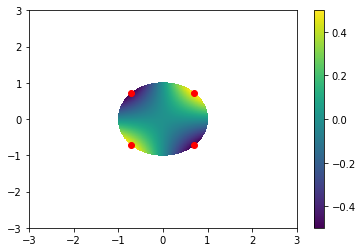

In [ ]:
x1 = np.linspace(-3,3,1000)
x2 = np.linspace(-3,3,1000)
v1, v2= np.meshgrid(x1,x2)

y = x1*x2
zval=v1*v2
z = np.ma.masked_where((1-v2**2-v1**2<0), zval)
figure, axes = plt.subplots()
H=axes.pcolormesh(x1,x2,z)
figure.colorbar(H)
plt.scatter(pointsx,pointsy,color="red")

Evidenciando asi que los puntos donde la funcion objetivo es maxima (cumpliendo las restricciones) son 2:


1) $(\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2})$


2) $(-\frac{\sqrt{2}}{2},-\frac{\sqrt{2}}{2})$